In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [11]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [12]:
data['region']=data['region'].map({'southeast':1,'southwest':2,'northwest':3,'northeast':4})

In [13]:
x=data.drop('charges',axis=1)
y=data['charges']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [17]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

In [18]:
df1=pd.DataFrame({'actual':y_test,'Lr':y_pred1,'Svm':y_pred2,'Rf':y_pred3,'Gr':y_pred4})

In [19]:
df1

,actual,Lr,Svm,Rf,Gr
764,9095.06825,8856.651536,9548.251773,10056.377128,10811.964678
887,5272.17580,7101.882358,9492.531632,5317.425167,5710.326610
890,29330.98315,36893.618988,9648.751486,28180.425902,27975.053777
1293,9301.89355,9470.364241,9555.046504,10640.106628,9769.965527
259,33750.29180,27035.848445,9420.451478,34511.652614,33571.934317
...,...,...,...,...,...
109,47055.53210,38918.765285,9648.755329,47163.629677,46190.330774
575,12222.89830,11780.420912,9625.424427,12885.058222,12766.157885
535,6067.12675,7584.912388,9504.169444,6407.645107,6994.841865
543,63770.42801,40806.644525,9604.910816,46878.546452,47895.118957


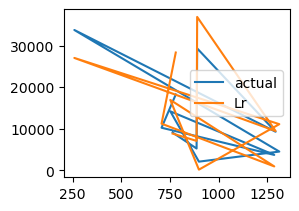

In [20]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['actual'].iloc[0:11],label='actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

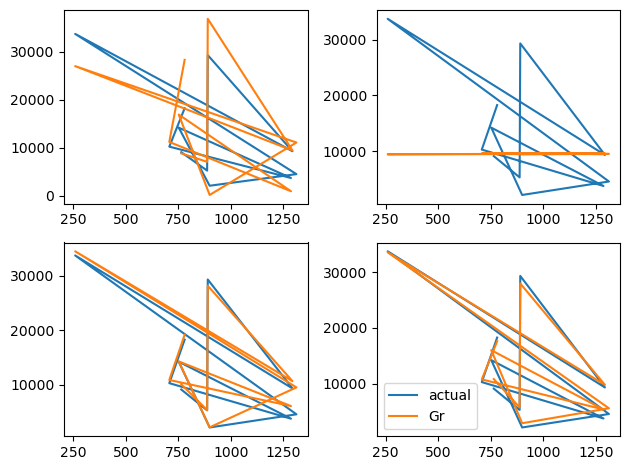

In [21]:
plt.subplot(221)
plt.plot(df1['actual'].iloc[0:11],label='actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')

plt.subplot(222)
plt.plot(df1['actual'].iloc[0:11],label='actual')
plt.plot(df1['Svm'].iloc[0:11],label='Svm')


plt.subplot(223)
plt.plot(df1['actual'].iloc[0:11],label='actual')
plt.plot(df1['Rf'].iloc[0:11],label='Rf')

plt.subplot(224)
plt.plot(df1['actual'].iloc[0:11],label='actual')
plt.plot(df1['Gr'].iloc[0:11],label='Gr')
plt.tight_layout()
plt.legend()

In [22]:
from sklearn import metrics

In [23]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [24]:
print(score1,score2,score3,score4)

0.7839279776463968 -0.07229855009938868 0.8658457913267826 0.8790364920597804


In [25]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [26]:
gr=GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [27]:
import joblib

In [28]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [29]:
model=joblib.load('model_joblib_gr')

In [70]:
model=joblib.load('model_joblib_gr')
data={'age':40,'sex':0,'bmi':50.30,'children':1,'smoker':1,'region':1}
df=pd.DataFrame(data,index=[0])
df1=model.predict(df)

import numpy as np
import pandas as pd
CSV = pd.DataFrame({
    "Prediction": df1
})

CSV.to_csv("prediction.csv", index=True)

SyntaxError: invalid syntax (1023842809.py, line 12)

In [80]:
import pandas as pd
data1 = pd.DataFrame(columns=['age','sex','bmi','children','smoker','region'])

while True:
    add_seg = input('Do you want to add a segment (Y/N)?: ')
    if (add_seg == 'Y')|(add_seg == 'y'):

        age = input('age ')
        sex = input('sex ')
        bmi = input('bmi ')
        children =input('children ')
        smoker = input('smoker')
        region = input('region ')
                     
                     
        d = {'age':int(age),'sex':int(sex),'bmi':int(bmi),'children':int(children),'smoker':int(smoker),'region':int(region)}
        data1= data1.join(d)


        


    else:
        break

Do you want to add a segment (Y/N)?: y
age 1
sex 1
bmi 1
children 1
smoker1
region 1


TypeError: DataFrame.join() got an unexpected keyword argument 'index'

In [31]:
df

,age,sex,bmi,children,smoker,region
0,39,0,10.3,2,1,1


In [32]:
model.predict(df)

array([18285.83373133])

In [37]:
import pandas as pd
model.predict(df)
CSV = pd.DataFrame({
    "Prediction": model
})

CSV.to_csv("prediction.csv", index=False)

In [34]:
from tkinter import *

In [35]:
import joblib

In [149]:
import csv
from tkinter import *

def writeCSV(data2):
    print (data2)
    with open('player2.csv', 'r+', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerows(data2)
master=Tk()
master.title("insurance cost prediction")
model=joblib.load('model_joblib_gr')
result=model.predict([[age,sex,bmi,children,smoker,region]])

    
    
def Get():
    age=e1.get()
    sex=e2.get()
    bmi=e3.get()
    children=e4.get()
    smoker=e5.get()
    region=e6.get()
    data2=[[age,sex,bmi,children,smoker,region,result]]
    print(data2)
    writeCSV(data2)

    
    

label=Label(master,text="insurance cost prediction",bg="black",fg="white").grid(row=0,columnspan=2)

Label(master,text="enter your age").grid(row=1)
Label(master,text="male or female [1/0]").grid(row=2)
Label(master,text="enter you bmi value").grid(row=3)
Label(master,text="enter number of children").grid(row=4)
Label(master,text="smoker yes or no [1/0]").grid(row=5)
Label(master,text="region [1-4]").grid(row=6)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text='predict',command=Get).grid()
mainloop()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


[['30', '1', '56', '1', '1', '1', array([13934.76994654])]]
[['30', '1', '56', '1', '1', '1', array([13934.76994654])]]


In [ ]:
res = pd.DataFrame(predictions)
res.index = X_test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results.csv")


def write():
    with open("file.csv","w",newline="") as fobj:
        wt=csv.writer(fobj,delimiter=',')
        age=e1.get()
        mf=e2.get()
        bmi=e3.get()
        children=e4.get()
        smoker=e5.get()
        region=e6.get()
        value=
        wt.writerow(['age','mf','bmi','children','smoker','region','value'])
        wt.writerow([age,mf,bmi,children,smoker,region,value])
        print("record have been inserted")
    fobj.close()

In [ ]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    
    model=joblib.load('model_joblib_gr')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    Label(master,text="insurance cost").grid(row=7)
    Label(master,text=result).grid(row=8)
    
    
     data2=([[age,sex,bmi,children,smoker,region,result]])